In [1]:
pip install deap


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [8]:
# Step 1: Define fitness and individual
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [9]:
# Step 2: Initialize toolbox
toolbox.register("attr_float", random.uniform, -5, 5)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=5)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


In [10]:
toolbox.register("evaluate", lambda ind: (sum(x**2 for x in ind),))
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)


In [6]:
def main():
   pop = toolbox.population(n=50)
   hof = tools.HallOfFame(1)
   stats = tools.Statistics(lambda ind: ind.fitness.values[0])
stats.register("avg", np.mean)
stats.register("max", np.max)

pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.2, ngen=40, stats=stats, halloffame=hof, verbose=False)




Best Individual: 5.824937950404242
Best Fitness: 1352980122137.8252


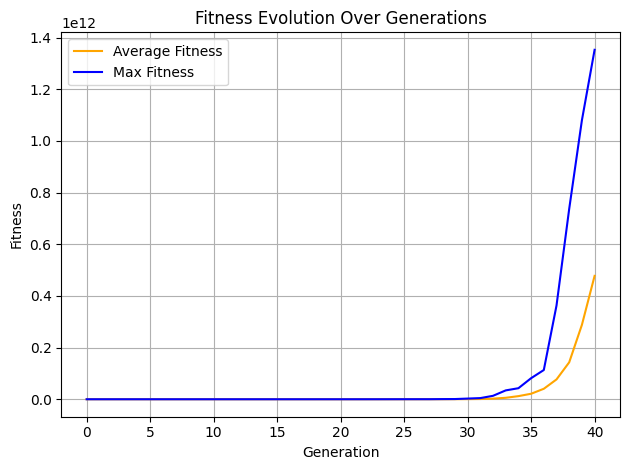

In [7]:
if __name__ == "__main__":
    pop, logbook, hof = main()
    # Print only final best result
    print("\nBest Individual:", hof[0][0])
    print("Best Fitness:", hof[0].fitness.values[0])
    # Plotting
    gen = logbook.select("gen")
    avg = logbook.select("avg")
    maxs = logbook.select("max")

    plt.plot(gen, avg, label="Average Fitness", color="orange")
    plt.plot(gen, maxs, label="Max Fitness", color="blue")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Fitness Evolution Over Generations")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

In [ ]:
# new DEAP implementation

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [4]:
# Step 1: Define fitness and individual
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In [5]:
# Step 2: Initialize toolbox
toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -5, 5)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=5)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [6]:
def eval_func(individual):
    return sum(x**2 for x in individual),  # Sphere function (minimize sum of squares)

In [7]:
toolbox.register("evaluate", eval_func)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

In [8]:
# Step 4: Main function
def main():
    pop = toolbox.population(n=50)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values[0])
    stats.register("avg", np.mean)
    stats.register("max", np.max)
    pop, logbook = algorithms.eaSimple(
        pop, toolbox, cxpb=0.7, mutpb=0.2, ngen=40,
        stats=stats, halloffame=hof, verbose=False
    )
    return pop, logbook, hof

Iteration  0: Best Fitness = 77.572760
Iteration  1: Best Fitness = 206.022786
Iteration  2: Best Fitness = 153.223881
Iteration  3: Best Fitness = 216.307555
Iteration  4: Best Fitness = 428.154586
Iteration  5: Best Fitness = 794.752501
Iteration  6: Best Fitness = 924.060130
Iteration  7: Best Fitness = 1773.246765
Iteration  8: Best Fitness = 4295.163639
Iteration  9: Best Fitness = 4847.946138
Iteration 10: Best Fitness = 12219.443255
Iteration 11: Best Fitness = 15998.035540
Iteration 12: Best Fitness = 46993.611229
Iteration 13: Best Fitness = 33193.693894
Iteration 14: Best Fitness = 38956.889577
Iteration 15: Best Fitness = 48198.117343
Iteration 16: Best Fitness = 57438.914914
Iteration 17: Best Fitness = 54696.454689
Iteration 18: Best Fitness = 95934.075282
Iteration 19: Best Fitness = 119034.355197
Iteration 20: Best Fitness = 125955.804380
Iteration 21: Best Fitness = 152656.545458
Iteration 22: Best Fitness = 156972.448070
Iteration 23: Best Fitness = 229799.314966
Itera

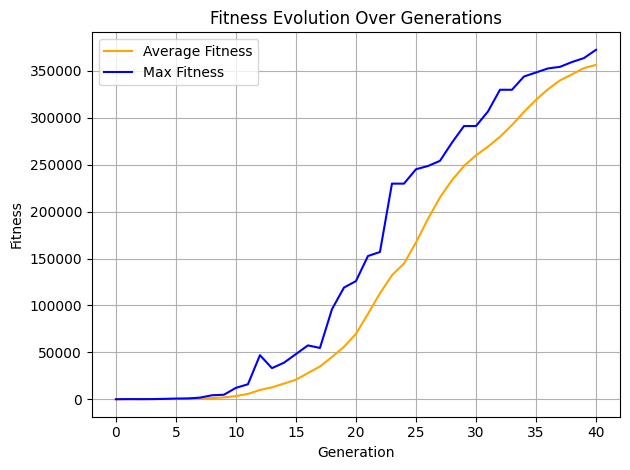

In [9]:
# Step 5: Main execution block
if __name__ == "__main__":
    pop, logbook, hof = main()

    # Print generation-wise best fitness
    for g, best in zip(logbook.select("gen"), logbook.select("max")):
        print(f"Iteration {g:2d}: Best Fitness = {best:.6f}")

    # Print final best solution
    print("\nBest Individual:", hof[0][0])
    print("Best Fitness:", hof[0].fitness.values[0])

    # Plotting
    plt.plot(logbook.select("gen"), logbook.select("avg"), label="Average Fitness", color="orange")
    plt.plot(logbook.select("gen"), logbook.select("max"), label="Max Fitness", color="blue")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title("Fitness Evolution Over Generations")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()